In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('treadmil-users.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [77]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


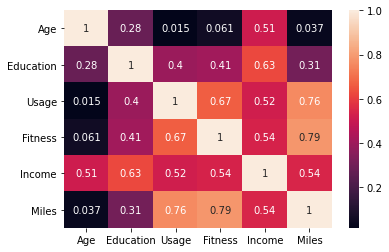

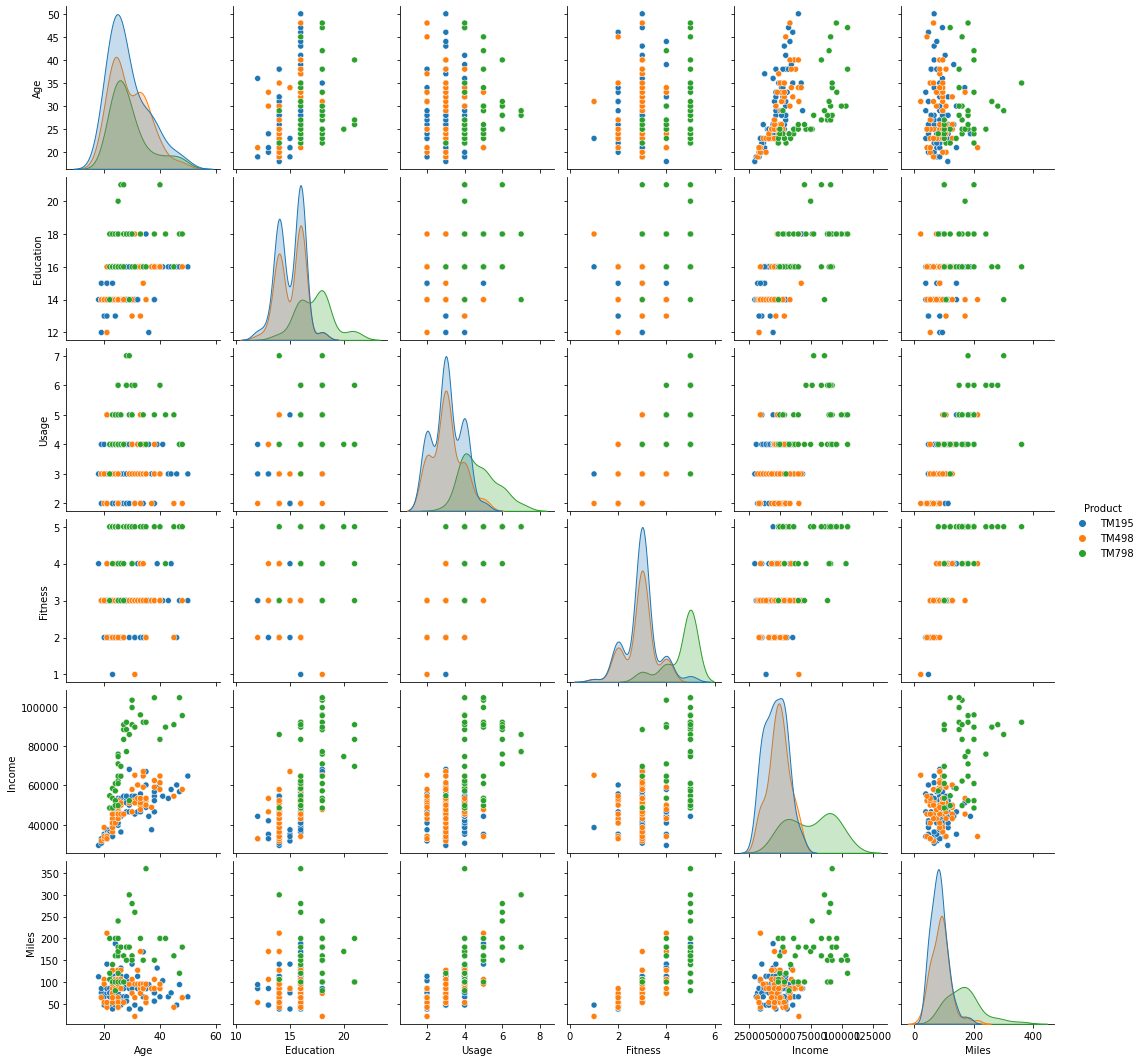

In [102]:
sns.heatmap(df.corr(),annot=True)
sns.pairplot(df,hue='Product')

In [74]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [80]:
col = ( 'Age', 'Education', 'Usage',
       'Fitness', 'Income', 'Miles')

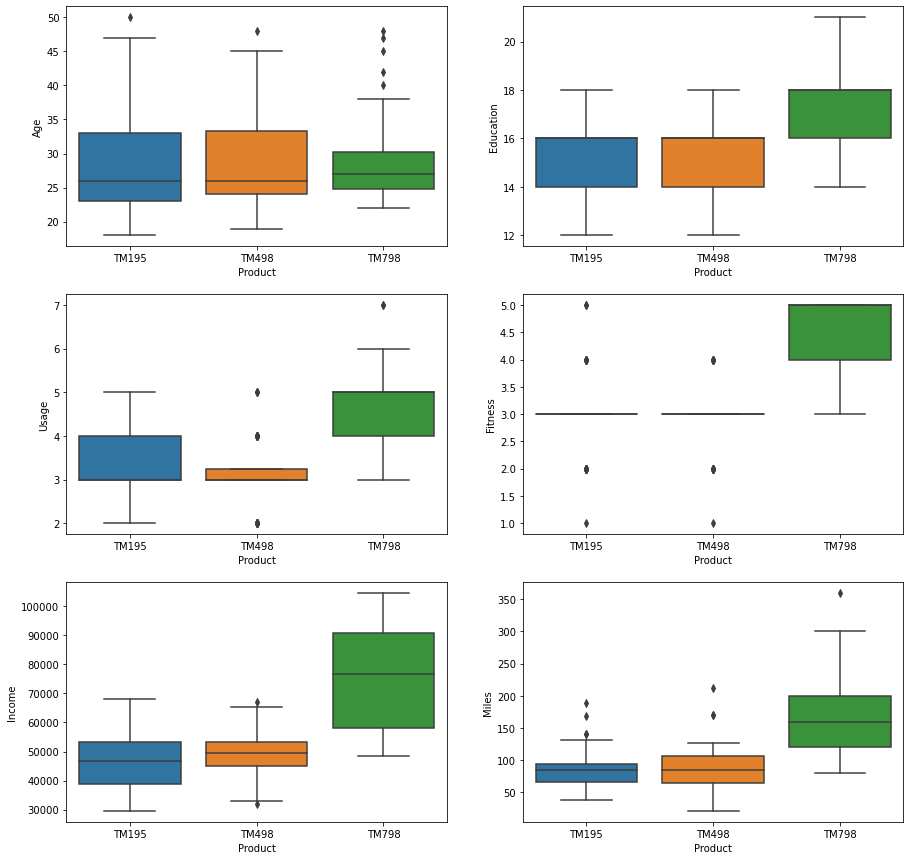

In [81]:
plt.figure(figsize=(15,15))
for i,cl in enumerate(col):
    plt.subplot(3,2,i+1)
    sns.boxplot(x='Product',y=cl,data=df)
    

<AxesSubplot:xlabel='Product', ylabel='count'>

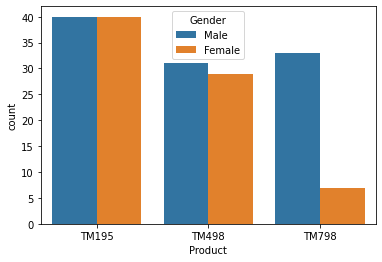

In [67]:
sns.countplot(x='Product',data=df,hue='Gender')

<AxesSubplot:xlabel='Product', ylabel='count'>

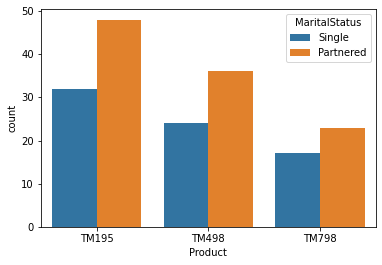

In [82]:
sns.countplot(x='Product',data=df,hue='MaritalStatus')

In [83]:
df2= pd.get_dummies(df,columns=['Gender','MaritalStatus'])

In [84]:
df2.head()

,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,TM195,18,14,3,4,29562,112,0,1,0,1
1,TM195,19,15,2,3,31836,75,0,1,0,1
2,TM195,19,14,4,3,30699,66,1,0,1,0
3,TM195,19,12,3,3,32973,85,0,1,0,1
4,TM195,20,13,4,2,35247,47,0,1,1,0


In [111]:
x=df2.drop(['Product'],axis=1)
y=df2['Product']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.2,random_state=100)

In [114]:
from sklearn import tree

In [115]:
model_tree = tree.DecisionTreeClassifier(random_state=100,criterion='entropy').fit(xtrain,ytrain)

In [116]:
model_tree.score(xtest,ytest)

0.8611111111111112

In [94]:
xtest.shape

(36, 9)